##Tesseract OCR para Imagens


In [ ]:
!pip install opencv-python

Primeiro, vamos instalar as dependências necessárias:

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev
!apt-get install -y tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,130 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Em seguida, podemos carregar a imagem e aplicar o OCR:

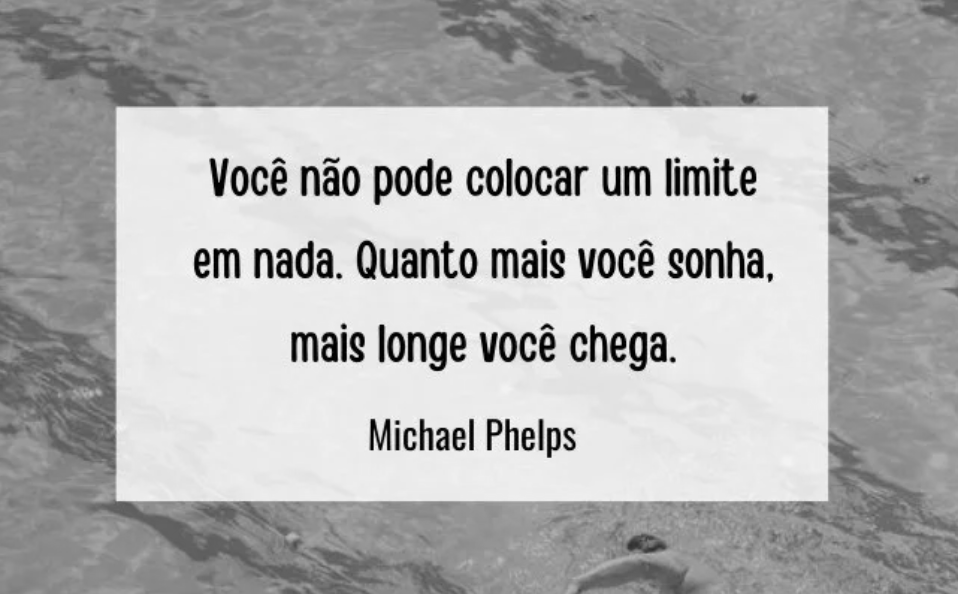

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

# Carregando a imagem
img = cv2.imread('/content/ESPORTE.png')

# Convertendo para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

# Aplicando o Tesseract OCR
texto = pytesseract.image_to_string(img_gray, lang='por')
print(texto)

In [ ]:
print(img)

[[[173 168  51]
  [178 174  56]
  [181 179  61]
  ...
  [142 128  14]
  [141 127  13]
  [141 127  13]]

 [[173 168  50]
  [178 174  57]
  [181 179  61]
  ...
  [142 128  14]
  [141 127  14]
  [142 128  14]]

 [[175 170  53]
  [180 175  59]
  [182 179  62]
  ...
  [144 130  16]
  [144 130  16]
  [145 131  17]]

 ...

 [[180 173  44]
  [180 173  44]
  [180 173  45]
  ...
  [191 185  67]
  [193 188  69]
  [196 190  72]]

 [[178 171  43]
  [178 171  43]
  [178 172  43]
  ...
  [192 187  67]
  [193 188  68]
  [194 190  69]]

 [[177 170  41]
  [177 170  41]
  [177 170  42]
  ...
  [192 187  65]
  [190 186  64]
  [191 186  64]]]


In [ ]:
print(img_gray)

[[134 139 144 ...  96  95  95]
 [133 139 144 ...  96  95  96]
 [136 141 144 ...  98  98  99]
 ...
 [135 135 136 ... 150 153 155]
 [134 134 134 ... 152 153 154]
 [132 132 133 ... 151 150 150]]


Pré-processamento e Melhoria de Imagem

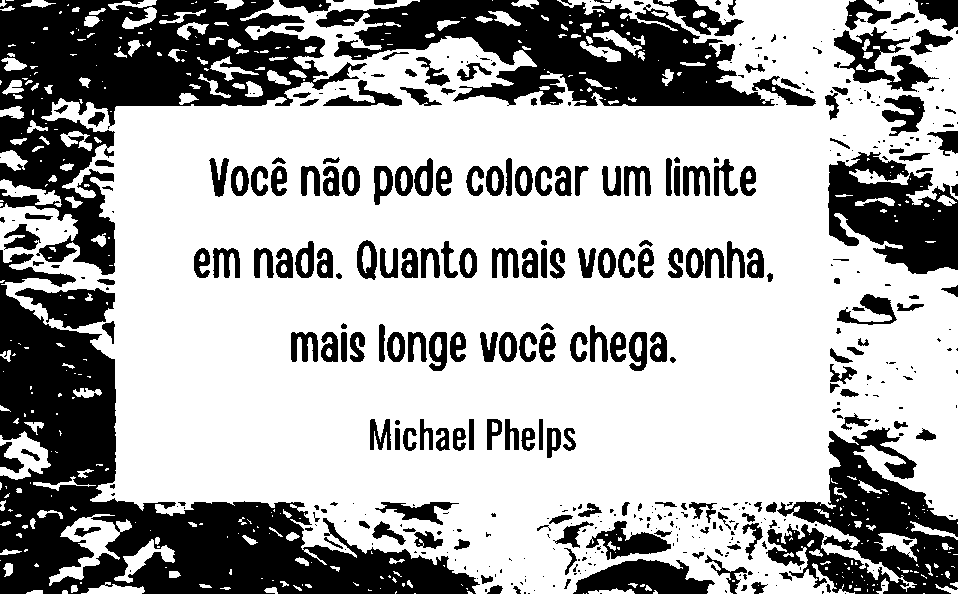

   

Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

 
 
   
 

 

Michael Phelps

 



In [ ]:
# Aplicando técnicas de thresholding
_, img_thresh = cv2.threshold(img_gray, 142, 255, cv2.THRESH_BINARY)
cv2_imshow(img_thresh)

# Extraindo texto após pré-processamento
texto_thresh = pytesseract.image_to_string(img_thresh, lang='por')
print(texto_thresh)

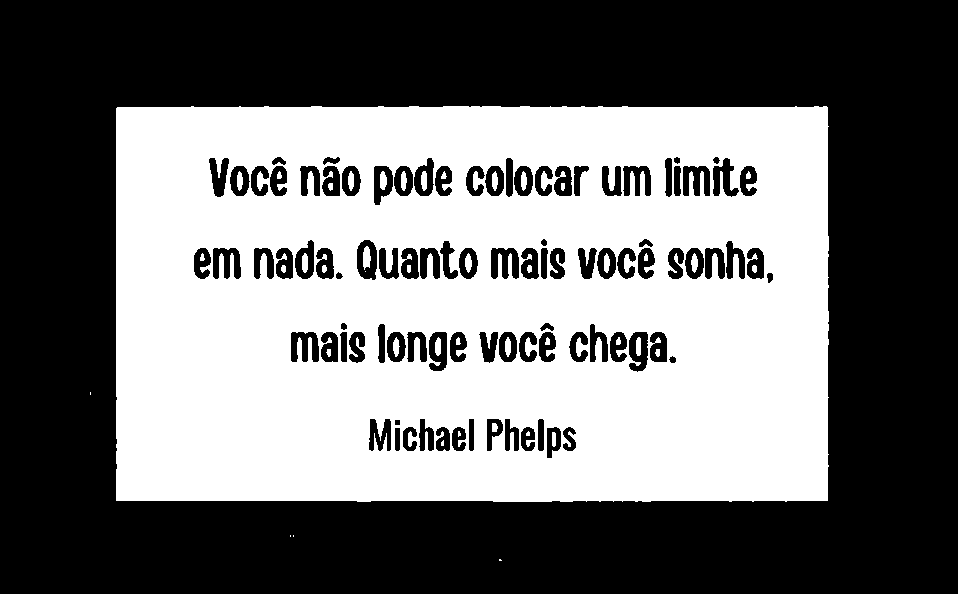

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [ ]:
# Aplicando o método de Otsu
_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(img_otsu)

# Extraindo texto após pré-processamento
texto_otsu = pytesseract.image_to_string(img_otsu, lang='por')
print(texto_otsu)

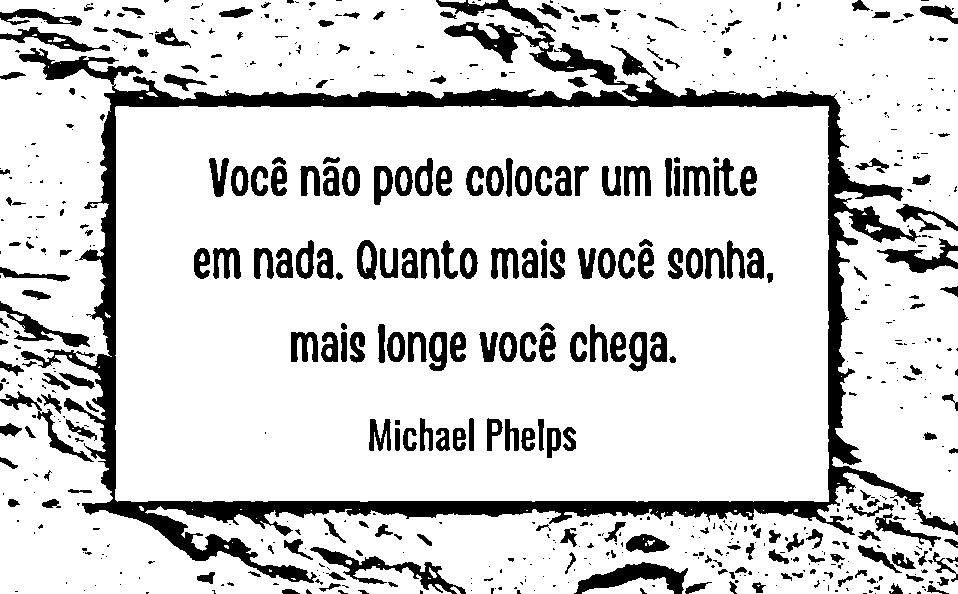

 
  
 

Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

   
   
 

Michael Phelps

 
 



In [ ]:
# Aplicando limiarização adaptativa
img_adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 9)
cv2_imshow(img_adaptive_mean)

# Extraindo texto após pré-processamento
texto_adaptive_mean = pytesseract.image_to_string(img_adaptive_mean, lang='por')
print(texto_adaptive_mean)


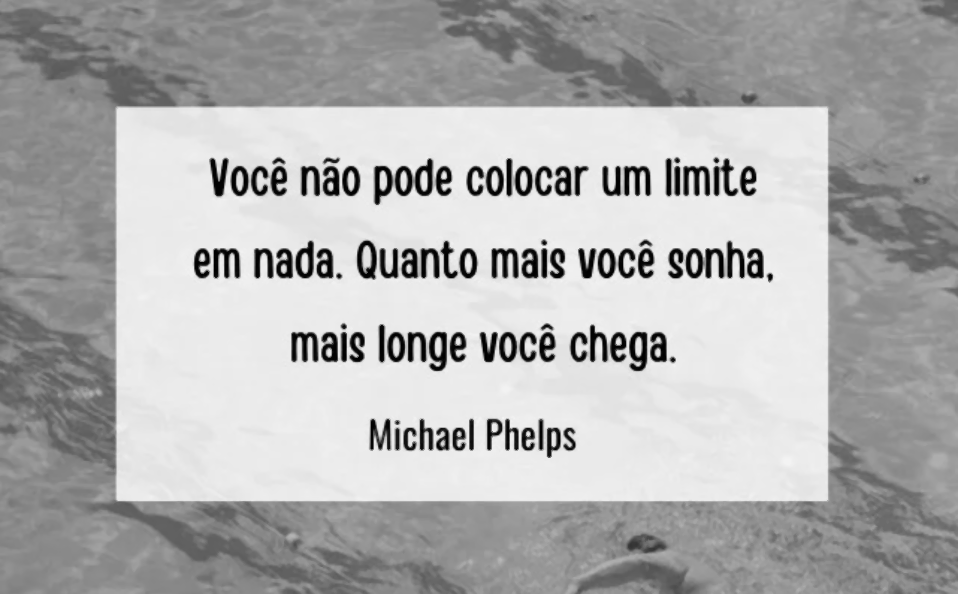

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [ ]:
# Aplicando filtros para remoção de ruído
img_median_blur = cv2.medianBlur(img_gray, 3)
cv2_imshow(img_median_blur)

# Extraindo texto após pré-processamento
texto_median_blur = pytesseract.image_to_string(img_median_blur, lang='por')
print(texto_median_blur)

## Analise da extração!

In [ ]:
from difflib import SequenceMatcher

# Texto original
texto_original = """
Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

Michael Phelps
"""

# Variáveis que contêm os textos OCR a serem verificados
texto_ocr_variants = {
    "texto": texto,
    "texto_thresh": texto_thresh,
    "texto_otsu": texto_otsu,
    "texto_adaptive_mean": texto_adaptive_mean,
    "texto_median_blur": texto_median_blur,
}

def compare_texts(original, ocr_text):
    matcher = SequenceMatcher(None, original, ocr_text)
    match_ratio = matcher.ratio()
    return match_ratio

def main():
    original_len = len(texto_original)
    print(f"Quantidade de caracteres no texto original: {original_len}\n")

    for variant_name, ocr_text in texto_ocr_variants.items():
        ocr_len = len(ocr_text)
        accuracy = compare_texts(texto_original, ocr_text)
        accuracy_percentage = accuracy * 100

        print(f"Resultado para {variant_name}:")
        print(f"Quantidade de caracteres no texto OCR: {ocr_len}")
        print(f"Percentual de acertos: {accuracy_percentage:.2f}%\n")


if __name__ == "__main__":
    main()


Quantidade de caracteres no texto original: 105

Resultado para texto:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%

Resultado para texto_thresh:
Quantidade de caracteres no texto OCR: 127
Percentual de acertos: 90.52%

Resultado para texto_otsu:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%

Resultado para texto_adaptive_mean:
Quantidade de caracteres no texto OCR: 129
Percentual de acertos: 89.74%

Resultado para texto_median_blur:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%



## Paddle OCR

In [ ]:
!pip install paddleocr==2.7.3
!pip install paddlepaddle==2.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 105.9 MB/s eta 0:00:00
   ━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
from paddleocr import PaddleOCR

# Inicializa o objeto PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Função para extrair texto OCR de um PDF
def extract_text_from_pdf(pdf_path):
    # Use o método `ocr.ocr()` para extrair texto de uma imagem
    extract_ocr = ocr.ocr(pdf_path)  # Removido o argumento `lang`

    # Concatene todas as palavras detectadas em uma única string
    result = ''
    for line in extract_ocr:
        for word in line:
            result += word[1][0] + ' '  # O índice 0 representa o texto da palavra
        result += '\n'  # Adicione uma nova linha após cada linha de texto
    return result



ModuleNotFoundError: No module named 'paddleocr'

In [ ]:
# from utils.AI_response_formatting import extract_fields
# from utils.ocr_extraction import OCRProcessor

# Caminho para o arquivo PDF
pdf_path = "/content/enel_ficticia.pdf"

# Extrai texto do PDF usando OCR
ocr_text = extract_text_from_pdf(pdf_path)

# Imprimir os campos extraídos
print(ocr_text)

[2024/07/29 23:44:52] ppocr DEBUG: dt_boxes num : 84, elapsed : 0.3356170654296875
[2024/07/29 23:44:52] ppocr DEBUG: cls num  : 84, elapsed : 0.17278432846069336
[2024/07/29 23:44:56] ppocr DEBUG: rec_res num  : 84, elapsed : 3.7334916591644287
enel mpla Energia e Servigos S. A 01.Sala 701. Aqwa Corporal DOCUMENTO AUXILIAR DA NOTA FISCAL DE ENERGIA ELETRICA ELETRONICA TIPO DE FORNECIMENTO NDE DIAS EITURA MONOFASICO 26/03/2024 26/04/2024 31 27/05/2024 Bruno Eliseo Alcantara DANSTALACAO/ Av Bosque da Fazenda, 141 840644 Leblon - Rio de Janeiro CEP:24350-000 CPF/ CNPJ: 112.343.433-01 NDO CLIENTE 5942541 59:13-03:00 MES/AN VENCIMENT TOTAL A PAGAF 04/2024 10/05/2024 R$264,48 DESCRICAO DO FATURAMENTO RBUTOSCAQUOTALR CONSUMO/kW Alouota ICMS Tnit (es) ISIPASE 3.2 TIPOS DE Kh213 0,29318 CPPRMUN 565588858 Subtotal Fatron 249.30 264,46 8,07 246,94 MENTOS DE MEI NMedidolT-614 P.Heraricl DataLeitor Loitura Leitura o Ajuste Sinief 01/2019 DADOS DE MEDICAO REAVISO DE CONTAS VENCIDAS Grandezas ENEL 8

In [ ]:
import re

# Expressões regulares para encontrar padrões específicos
padrao_cpf_cnpj = r"CPF/ CNPJ:\s([\d.-]+)"
padrao_nome_cliente = r"CPF:\s([\w\s]+)\s\d{3}\.\d{3}\.\d{3}-\d{2}"
padrao_num_cliente = r"NDO CLIENTE\s(\d+)"
padrao_data_leitura = r"DataLeitor\sLeitura\s(\d{2}/\d{2}/\d{4})"
padrao_data_vencimento = r"MES/AN\sVENCIMENT\sTOTAL\sA\sPAGAF\s(\d{2}/\d{4}\s\d{2}/\d{2}/\d{4})"
padrao_valor_total = r"R\$(\d+,\d{2})"
padrao_descricao_faturamento = r"DESCRICAO DO FATURAMENTO(.*?)MENTOS DE MEI"
padrao_referencia_faturamento = r"Referencia\s(\d{2}/\d{4}\s\d{2}/\d{2}/\d{4})"
padrao_qr_code = r"Pague via PIX! Utilize este QR Code"

# Função para extrair informações com base nos padrões de expressão regular
def extrair_informacoes(texto, padrao):
    match = re.search(padrao, texto)
    if match:
        return match.group(1)
    else:
        return None

# Extrair informações
cpf_cnpj = extrair_informacoes(ocr_text, padrao_cpf_cnpj)
nome_cliente = extrair_informacoes(ocr_text, padrao_nome_cliente)
num_cliente = extrair_informacoes(ocr_text, padrao_num_cliente)
data_vencimento = extrair_informacoes(ocr_text, padrao_data_vencimento)
valor_total = extrair_informacoes(ocr_text, padrao_valor_total)
referencia_faturamento = extrair_informacoes(ocr_text, padrao_referencia_faturamento)

# Verificar se há QR Code presente
qr_code_presente = re.search(padrao_qr_code, ocr_text) is not None

# Exibir informações extraídas
print("Nome do Cliente:", nome_cliente)
print("CPF/CNPJ:", cpf_cnpj)
print("Número do cliente:", num_cliente)
print("Data de vencimento:", data_vencimento)
print("Valor total:", valor_total)
print("Referência do faturamento:", referencia_faturamento)
print("QR Code presente:", qr_code_presente)


Nome do Cliente: Bruno Eliseo Alcantara
CPF/CNPJ: 112.343.433-01
Número do cliente: 5942541
Data de vencimento: 04/2024 10/05/2024
Valor total: 264,48
Referência do faturamento: 05/2024 10/05/2024
QR Code presente: True
